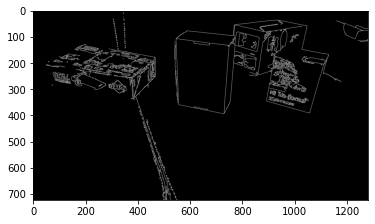

In [102]:
import cv2
import numpy as np
#from shapeDetector import ShapeDetector
import imutils
from matplotlib import pyplot as plt

image0=cv2.imread("body/boxs4.jpg")
image = cv2.cvtColor(image0, cv2.COLOR_BGR2GRAY)

color=(36,255,12)
thickness=2
#FILTERING
if 0:
    image = cv2.GaussianBlur(image, (3, 3), 0)
    #BINARIZATION
else:
    image=cv2.bilateralFilter(image,21,10,10)

if 1:
    binariz = cv2.Canny(image, 5, 100, 10)
else:
    _,binariz = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    # NOT WORKING
    if 1:
        kernel = np.ones((30,30),np.uint8)
    else:
        kernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( 7, 7) )   
# OPENING= DILATE+ERODE
# CLOSING= ERODE+DILATE  or was the opposite

if 0:
    image = cv2.erode(image,kernel,iterations = 10)
    image = cv2.dilate(image,kernel,iterations = 10)
else:
    imgrect = cv2.morphologyEx( image, cv2.MORPH_CLOSE, kernel )
    # CONTOURS
cnts = cv2.findContours(binariz, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#implement the better funtion to pick cnts wrt py version
#cnts=imutils.xyz(cnts)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# CHERRYPICKING
#M = cv2.moments(c)
#center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
# DRAWING
if 0:
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x,y), (x+w,y+h), color, thickness)
        # "WORKING"
else:
    for c in cnts:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(image,[box],0,color,thickness)
        # STILL I THINK NOT WORKING
        
plt.imshow(binariz,cmap='gray')
plt.show()

In [3]:
# taking biggest contour and minarearect
max_contour = max(cnts, key=len)
rect = cv2.minAreaRect(max_contour)
#if self.verifySizes(rect):
    #...
    #rect.append(...verifyed) 
poly = cv2.boxPoints(rect)
#cx, cy = rect[0]
#w, h = rect[1]
#theta = rect[2]
#box[idx, :] = [cx, cy, w, h, theta]
#box = np.asarray(box, dtype = xs.dtype)

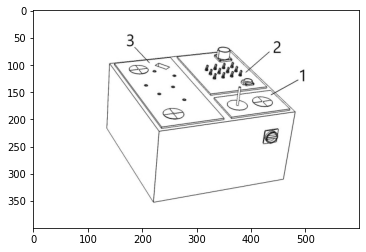

In [108]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

image=cv2.imread("body/panel-prospective.jpg")
#print(image.shape)
color=(36,255,12)
thickness=2

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
if 1:
    canny = cv2.Canny(blurred, 120, 255, 1)
else:
    ret,canny = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    # NOT WORKING
    
cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#print(cnts)
# Iterate thorugh contours and draw rectangles around contours
#if 0:
 #   for c in cnts:
  #      x,y,w,h = cv2.boundingRect(c)
   #     cv2.rectangle(image, (x,y), (x+w,y+h), color, thickness)
        # "WORKING"
#else:
 #   for c in cnts:
  #      rect = cv2.minAreaRect(c)
   #     box = cv2.boxPoints(rect)
    #    box = np.int0(box)
     #   cv2.drawContours(image,[box],0,color,thickness)
        # STILL I THINK NOT WORKING
        
plt.imshow(image)
plt.show()

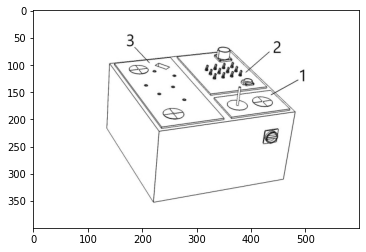

In [5]:
import cv2
import numpy as np
#from shapeDetector import ShapeDetector
import imutils
from matplotlib import pyplot as plt

image=cv2.imread("body/panel-prospective.jpg")
if 1:
    kernel = np.ones((30,30),np.uint8)
else:
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( 7, 7) )   

if 0:
    image = cv2.erode(image,kernel,iterations = 10)
    image = cv2.dilate(image,kernel,iterations = 10)
else:
    imgrect = cv2.morphologyEx( image, cv2.MORPH_CLOSE, kernel )
    
plt.imshow(image)
plt.show()

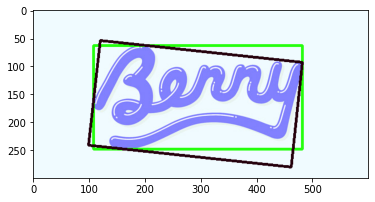

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image, convert to grayscale, Otsu's threshold for binary image
image = cv2.imread("body/commercial.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, find rotated rectangle, obtain four verticies, and draw 
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

x,y,w,h = cv2.boundingRect(cnts[0])
cv2.rectangle(image, (x,y), (x+w,y+h), (36,255,12), 3)

rect = cv2.minAreaRect(cnts[0])
box = np.int0(cv2.boxPoints(rect))
cv2.drawContours(image, [box], 0, (36,0,12), 3) # OR
    #cv2.polylines(image, [box], True, (36,255,12), 3)
    


plt.imshow(image)
plt.show()

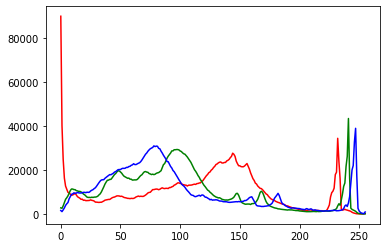

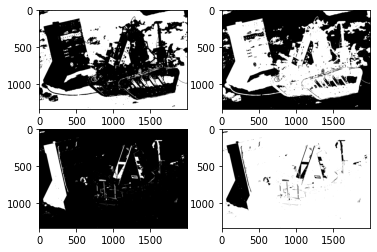

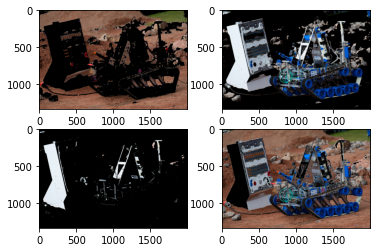

In [1]:
# color segmentation
#https://realpython.com/python-opencv-color-spaces/
#https://stackoverflow.com/questions/7722519/fast-rgb-thresholding-in-python-possibly-some-smart-opencv-code
#https://stackoverflow.com/questions/16882928/color-thresholding-on-an-opencv-video
#thresholding in general: https://stackoverflow.com/questions/60110313/opencv-thresholding-adaptive-to-different-lightning-conditions
#splitting: https://subscription.packtpub.com/book/data/9781789344912/7/ch07lvl1sec81/thresholding-color-images
#

import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.cvtColor(cv2.imread("body/task-example.jpg"), cv2.COLOR_BGR2RGB)
imager=image[:,:,0]
imageg=image[:,:,1]
imageb=image[:,:,2]

if 0: #prints all 3 channels
    plt.imshow(imager)
    plt.show()
    plt.imshow(imageg)
    plt.show()
    plt.imshow(imageb)
    plt.show()

histr,_ = np.histogram(imager,256,[0,256])#may use imager.flatten()
histg,_ = np.histogram(imageg,256,[0,256])
histb,_ = np.histogram(imageb,256,[0,256])
plt.plot(histr,color = 'r')
plt.plot(histg,color = 'g')
plt.plot(histb,color = 'b')
plt.show()
minred=(50,50,50)
maxred=(255,255,255)
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

imagehsv=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

masknored = cv2.bitwise_not(cv2.inRange(imagehsv, minred,maxred))
maskred = (cv2.inRange(imagehsv, minred,maxred))
imagenored = cv2.bitwise_and(image,image, mask=masknored)
imagered= cv2.bitwise_and(image,image, mask=maskred)
maskwhite = cv2.inRange(imagehsv, light_white, dark_white)
imagewhite = cv2.bitwise_and(image, image, mask=maskwhite)
masknowhite =  cv2.bitwise_not(cv2.inRange(imagehsv, light_white, dark_white))
imagenowhite =cv2.bitwise_and(image, image, mask=masknowhite)

#maskfin= maskred + maskwhite
#imagefin = cv2.bitwise_and(image,image, mask=maskfin)
plt.subplot(2, 2, 1)
plt.imshow(maskred, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(masknored, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(maskwhite, cmap="gray")
plt.subplot(2, 2, 4)
plt.imshow(masknowhite, cmap="gray")
plt.show()

plt.subplot(2, 2, 1)
plt.imshow(imagered)
plt.subplot(2, 2, 2)
plt.imshow(imagenored)
plt.subplot(2, 2, 3)
plt.imshow(imagewhite)
plt.subplot(2, 2, 4)
plt.imshow(imagenowhite)
plt.show()


In [ ]:
#totally stolen

import cv2
import time
import numpy as np

##################
DELAY = 0.02
USE_CAM = 1
IS_FOUND = 0

MORPH = 7
CANNY = 250
##################
# 420x600 oranı 105mmx150mm gerçek boyuttaki kağıt için
_width  = 600.0
_height = 420.0
_margin = 0.0
##################

if USE_CAM: video_capture = cv2.VideoCapture(0)

corners = np.array(
    [
    [[  _margin, _margin]],
    [[ _margin, _height + _margin  ]],
    [[ _width + _margin, _height + _margin  ]],
    [[ _width + _margin, _margin ]],
    ]
)

pts_dst = np.array( corners, np.float32 )

while True :

    if USE_CAM :
        ret, rgb = video_capture.read()
    else :
        ret = 1
        rgb = cv2.imread( "opencv.jpg", 1 )

    if ( ret ):

        gray = cv2.cvtColor( rgb, cv2.COLOR_BGR2GRAY )

        gray = cv2.bilateralFilter( gray, 1, 10, 120 )

        edges  = cv2.Canny( gray, 10, CANNY )

        kernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( MORPH, MORPH ) )

        closed = cv2.morphologyEx( edges, cv2.MORPH_CLOSE, kernel )
        _,contours, h = cv2.findContours( closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )

        for cont in contours:

            # Küçük alanları pass geç
            if cv2.contourArea( cont ) > 5000 :

                arc_len = cv2.arcLength( cont, True )

                approx = cv2.approxPolyDP( cont, 0.2 * arc_len, True )

                if ( len( approx ) == 4 ):
                    IS_FOUND = 1
                    #M = cv2.moments( cont )
                    #cX = int(M["m10"] / M["m00"])abs
                    #cY = int(M["m01"] / M["m00"])
                    #cv2.putText(rgb, "Center", (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)

                    pts_src = np.array( approx, np.float32 )

                    h, status = cv2.findHomography( pts_src, pts_dst )
                    out = cv2.warpPerspective( rgb, h, ( int( _width + _margin * 2 ), int( _height + _margin * 2 ) ) )

                    cv2.drawContours( rgb, [approx], -1, ( 255, 0, 0 ), 2 )

                else : pass

        #cv2.imshow( 'closed', closed )
        #cv2.imshow( 'gray', gray )
        

        if IS_FOUND :
            cv2.namedWindow( 'out', cv2.CV_WINDOW_AUTOSIZE )
            cv2.imshow( 'out', out )

        if cv2.waitKey(27) & 0xFF == ord('q') :
            break

        if cv2.waitKey(99) & 0xFF == ord('c') :
            current = str( time.time() )
            cv2.imwrite( 'ocvi_' + current + '_edges.jpg', edges )
            cv2.imwrite( 'ocvi_' + current + '_gray.jpg', gray )
            cv2.imwrite( 'ocvi_' + current + '_org.jpg', rgb )
            print("Pictures saved")

        time.sleep( DELAY )

    else :
      #  print "Stopped"
        break

if USE_CAM : video_capture.release()
cv2.destroyAllWindows()

In [ ]:
#param
GAUSS=5
CANNY = 250
MORPH = 7
usefilter='bilinear'
usemethod='canny'
useclosing='morp'

img1=cv2.imread("body/frigo1.jpg")
img2=cv2.imread('body/frigo2.jpg')
img3=cv2.imread('body/libri.jpg')
img4=cv2.imread('body/pag1.jpg')
img5=cv2.imread('body/tavolo1.jpg')
img6=cv2.imread('body/tavolo2.jpg')
img7=cv2.imread('../2-markers/test-imgs/double-rectangle.jpg')
#img0=np.copy(img)

imgcnts1= findRectangles(img1,usefilter,usemethod,useclosing,GAUSS,CANNY,MORPH)
cv2.drawContours(img1, imgcnts1, -1, (0,255,0), 3)
imgcnts2= findRectangles(img2,usefilter,usemethod,useclosing,GAUSS,CANNY,MORPH)
cv2.drawContours(img2, imgcnts2, -1, (0,255,0), 3)
imgcnts3= findRectangles(img3,usefilter,usemethod,useclosing,GAUSS,CANNY,MORPH)
cv2.drawContours(img3, imgcnts3,-1, (0,255,0), 3)
imgcnts4= findRectangles(img4,usefilter,usemethod,useclosing,GAUSS,CANNY,MORPH)
cv2.drawContours(img4, imgcnts4, -1, (0,255,0), 3)
imgcnts5= findRectangles(img5,usefilter,usemethod,useclosing,GAUSS,CANNY,MORPH)
cv2.drawContours(img5, imgcnts5, -1, (0,255,0), 3)
imgcnts6= findRectangles(img6,usefilter,usemethod,useclosing,GAUSS,CANNY,MORPH)
cv2.drawContours(img6, imgcnts6, -1, (0,255,0), 3)
imgcnts7= findRectangles(img7,usefilter,usemethod,useclosing,GAUSS,CANNY,MORPH)
cv2.drawContours(img7, imgcnts7, -1, (0,255,0), 3)

#print("Areas:", areas)

# Display our image
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img7, cv2.COLOR_BGR2RGB))

#plt.subplot(4,2,1)
#plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
#plt.title("all rectangles around the aruco")
#plt.subplot(4,2,2)
#plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
#plt.subplot(4,2,3)
#plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
#plt.subplot(4,2,4)
#plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
#plt.subplot(4,2,5)
#plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
#plt.subplot(4,2,6)
#plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
#plt.subplot(4,2,7)
#plt.imshow(cv2.cvtColor(img7, cv2.COLOR_BGR2RGB))
plt.show()